## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

The data I chose consists of variables with information to the participants physical health, depression, and lifestyle habits. I thought this would be interesting to study to see if there is any correlation between lifestyle habits and poor/strong mental and physical health. 

In [19]:
import pandas as pd
df = pd.read_excel("gss.xlsx") 
df.head()

,year,id_,health,slpprblm,stress12,depress,ballot,lifenow,hlthprb,docvst,medcommt,medbest,yrartxbt,yrmovie,yrcreat,yrrdg,worksick
0,1972,1,Good,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,-70
1,1972,2,Fair,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,-70
2,1972,3,Excellent,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,-70
3,1972,4,Good,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,-70
4,1972,5,Good,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,-70


Right away I am noticing that in most of the early years there is no data. I will continue to use these variables but focus it only on the years when all data is available

In [22]:
import numpy as np
#replace missing entries with NaN
df.replace({".i:  Inapplicable": np.nan, ".y:  Not available in this year": np.nan}, inplace=True)

#replace negative values with NaN
df.replace(-100, np.nan, inplace=True)
df.replace(-70, np.nan, inplace=True)

#convert categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype('category')

df.head()

,year,id_,health,slpprblm,stress12,depress,ballot,lifenow,hlthprb,docvst,medcommt,medbest,yrartxbt,yrmovie,yrcreat,yrrdg,worksick
0,1972,1,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,2,Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,3,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1972,4,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,5,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#drop rows with NaN
df_cleaned = df.dropna()

df_cleaned.head()

,year,id_,health,slpprblm,stress12,depress,ballot,lifenow,hlthprb,docvst,medcommt,medbest,yrartxbt,yrmovie,yrcreat,yrrdg,worksick
68864,2022,19,Good,Sometimes,No,Yes,Ballot c,6,Sometimes,Often,No,It's likely R would not get,No,Yes,No,No,2.0
68896,2022,51,Good,Never,No,No,Ballot c,Best possible state,Never,Sometimes,No,It's certain R would get,Yes,No,No,Yes,0.0
68947,2022,102,Good,Sometimes,No,No,Ballot c,8,Never,Sometimes,No,It's likely R would get,No,No,No,Yes,1.0
68975,2022,130,Excellent,Sometimes,No,No,Ballot c,8,Never,Seldom,Did not need medical treatment,It's likely R would get,Yes,Yes,Yes,Yes,0.0
69033,2022,188,Good,Rarely,No,No,Ballot c,Best possible state,Never,Seldom,No,It's certain R would get,No,Yes,No,No,0.0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
numeric_summary = df_cleaned.describe()

categorical_summary = df_cleaned.describe(include=['category'])

numeric_summary, categorical_summary
#noticing that the only data is from 2022, which could be interesting due to pandemic!

(         year          id_   worksick
 count    62.0    62.000000  62.000000
 mean   2022.0  1732.758065   2.741935
 std       0.0  1071.828997  11.993079
 min    2022.0    19.000000   0.000000
 25%    2022.0   654.750000   0.000000
 50%    2022.0  1786.500000   0.000000
 75%    2022.0  2634.750000   1.000000
 max    2022.0  3533.000000  90.000000,
        health   slpprblm stress12 depress    ballot lifenow hlthprb  \
 count      62         62       62      62        62      62      62   
 unique      3          4        4       2         1       7       6   
 top      Good  Sometimes       No      No  Ballot c       9   Never   
 freq       38         29       48      46        62      25      36   
 
            docvst medcommt                  medbest yrartxbt yrmovie yrcreat  \
 count          62       62                       62       62      62      62   
 unique          6        3                        5        3       2       2   
 top     Sometimes       No  It's likely R 

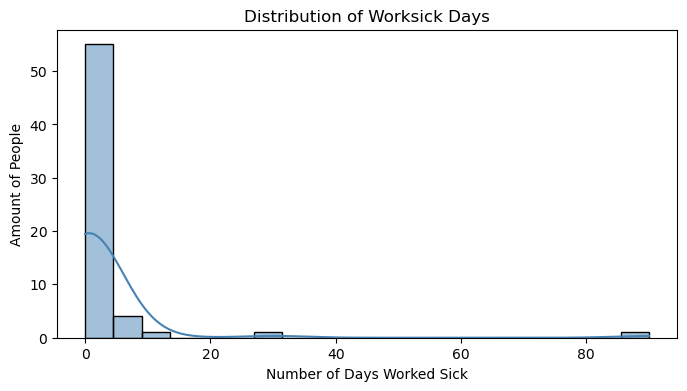

In [55]:
#visualization 1: bar graph of how many days people worked sick
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned["worksick"], kde=True, bins=20, color="steelblue")
plt.title("Distribution of Worksick Days")
plt.xlabel("Number of Days Worked Sick")
plt.ylabel("Amount of People")
plt.show()

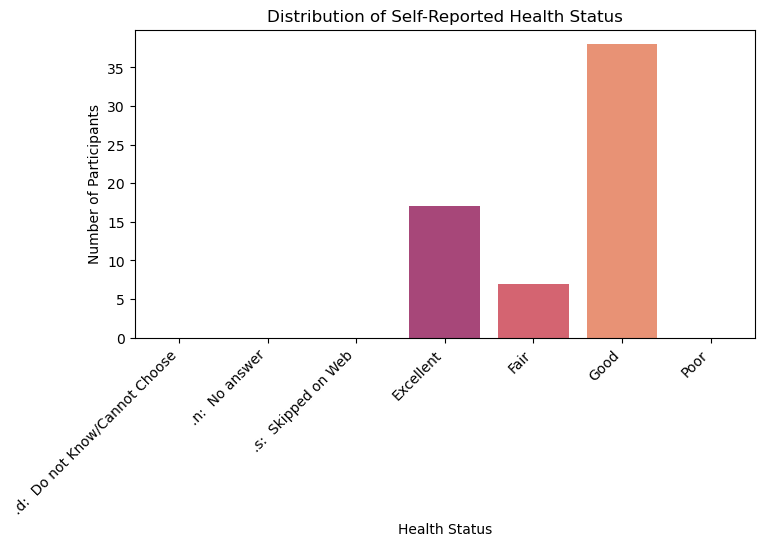

In [54]:
#visualization 2: graph to see self-reported health status 
plt.figure(figsize=(8, 4))
sns.countplot(x=df_cleaned["health"], palette="magma")
plt.xticks(rotation=45, ha="right") 
plt.title("Distribution of Self-Reported Health Status")
plt.xlabel("Health Status")
plt.ylabel("Number of Participants")
plt.show()

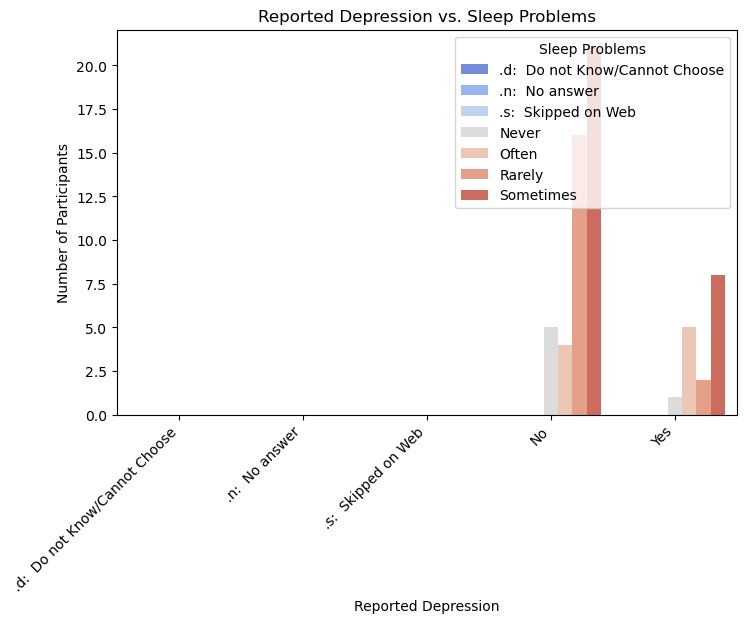

In [87]:
#visualization 3: graph to see correlation between depression and sleep problems 
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="depress", hue="slpprblm", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Reported Depression vs. Sleep Problems")
plt.xlabel("Reported Depression")
plt.ylabel("Number of Participants")
plt.legend(title="Sleep Problems")
plt.show()

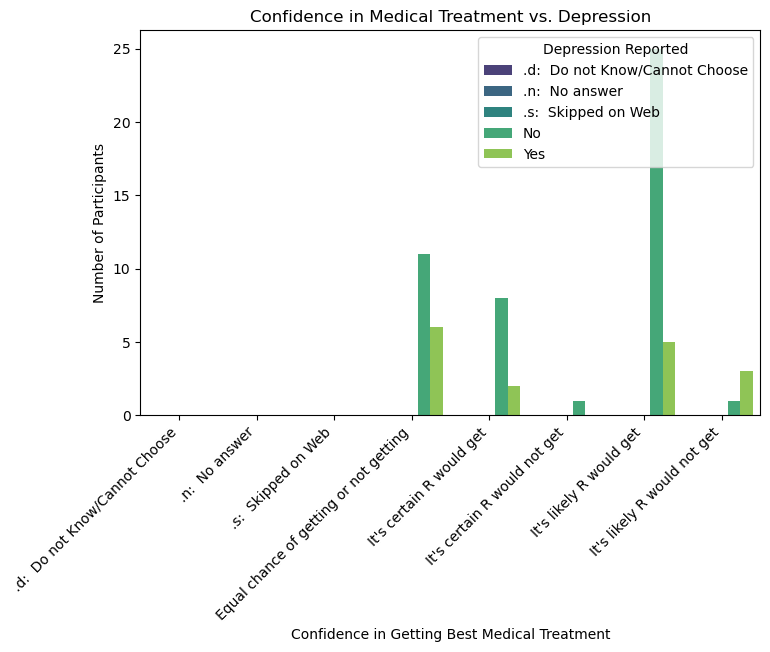

In [56]:
#visualization 4: graph to see if there was correlation between confidence in doctors and depression levels
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="medbest", hue="depress", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Confidence in Medical Treatment vs. Depression")
plt.xlabel("Confidence in Getting Best Medical Treatment")
plt.ylabel("Number of Participants")
plt.legend(title="Depression Reported")
plt.show()

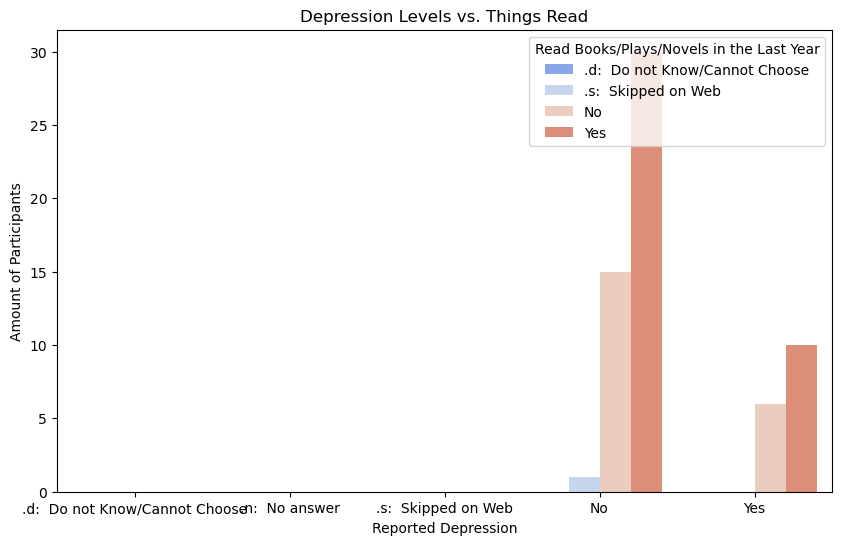

In [89]:
#visualization 5: graph of self-reported depression and novels/books/poetry/plays (etc) read
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="depress", hue="yrrdg", palette="coolwarm")
plt.title("Depression Levels vs. Things Read")
plt.xlabel("Reported Depression")
plt.ylabel("Amount of Participants")
plt.legend(title="Read Books/Plays/Novels in the Last Year")
plt.show()

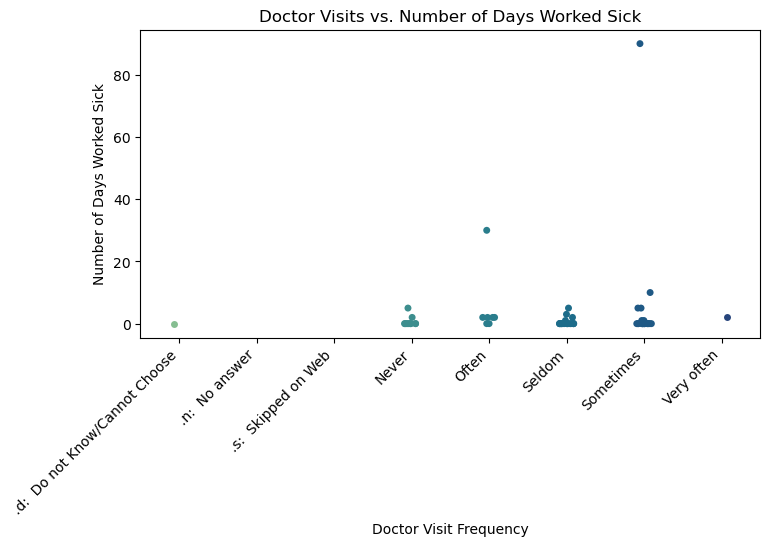

In [90]:
#visualization 6: graph to see correlation between doctor visits and days participants worked sick
plt.figure(figsize=(8, 4))
sns.stripplot(data=df_cleaned, x="docvst", y="worksick", jitter=True, palette="crest")
plt.title("Doctor Visits vs. Number of Days Worked Sick")
plt.xlabel("Doctor Visit Frequency")
plt.ylabel("Number of Days Worked Sick")
plt.xticks(rotation=45, ha="right")
plt.show()

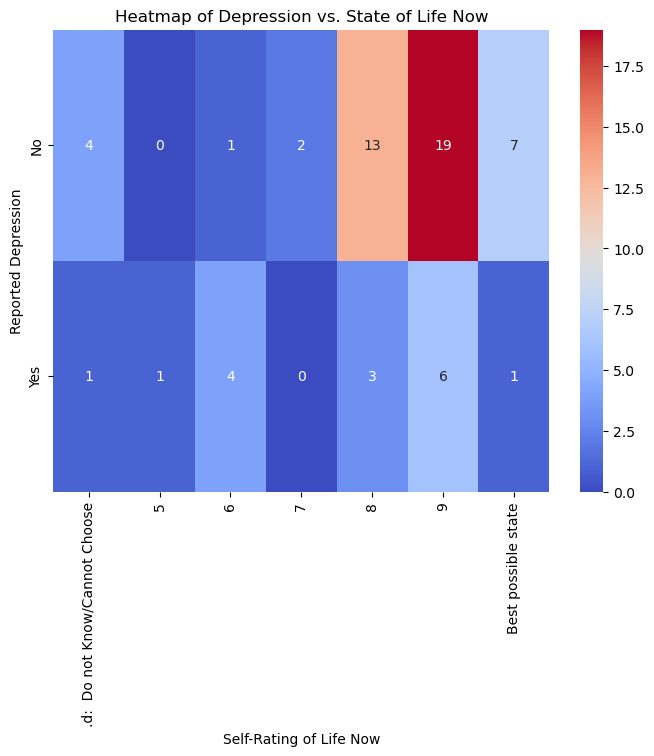

In [88]:
#visualization 7: heatmap of reported depression and how participants would rank their life currently on a scale of 1-10
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df_cleaned["depress"], df_cleaned["lifenow"]), annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Depression vs. State of Life Now")
plt.xlabel("Self-Rating of Life Now")
plt.ylabel("Reported Depression")
plt.show()

My findings were not what I was expecting at all. Firstly, the variables I picked were very recently added to the GSS, so there was not much data over the years. Secondly, in the original spreadsheet I downloaded, I noticed that most of the questions alternated years (except for 2022), which is why all the cleaned data comes from only one year, 2022. However, I decided to roll with it as I thought it would be interesting to see the results of such a unique and impactful year. I originally theorized that I would see a correlation between things like mental health, sleep problems, faith in healthcare, and lifestyles. I believed that mental health and stress would be reduced in people who regularly went to the doctor and were active outside of their work-life. However, my results showed me the opposite findings. 
In visualization 1 (number of days people worked sick), I was surprised that most people put 0. However, this makes sense looking back as most people were working virtually. The second graph shows participants' self-reported health status. Once again, due to COVID people were quarantined, which significantly decreased the amount of viruses and other illnesses being spread. The use of masks and more healthy sanitization in public spaces this year also contributed to this. In graph 3 I expected to see a positive correlation between depression and sleep problems, however in both the 'No' and 'Yes' category for reported depression there were higher amounts of sleeping problems, so I believe this could be attributed to other factors than just mental health. Another theory is that many people refuse to admit that they do struggle with mental health issues, which could be better reflected if I had included more variables relating to this. Graph 4 charts the correlation between self-reported depression and confidence in the medical field. I originally hypothesized that participants with depression would have lower faith in the healthcare system, which was proved correct: most participants who did not believe that they would get sufficient medial treatment also reported having depression within the last year. In graph 5, I wanted to see if there was a connection between reported depression and participants reading any novels/books/poetry (etc). I theorized that participants who had a healthy lifestyle balance would have healthier mindsets, although from this graph I could not prove this theory correct, as most participants (regardless of depression levels) reported reading. However this could also be attributed to quarantine. Also, I did not see a strong correlation between the number of visits to the doctor and number of days worked sick in graph 6. Finally, the last visualization had very mixed results: I had originally expected to see people with self-reported depression to rank their current lives very low, but it was a variety of rankings and results. I think that a lot of the results I gathered were a little different than one might expect due to how different 2022 was for everyone. In the future I would love to run these same tests again to see how the attitude towards mental health, health visits, and lifestyle have changed over the next two years. 